<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/GameStatsGraphs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the library for NFL Data
!pip install nfl_data_py

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

import nfl_data_py as nfl

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

In [3]:
stats = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)
stats.head()

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [4]:
run_stats = stats.groupby(["posteam", "run_gap", "run_location"]).size().reset_index(name = "run_count")
run_stats.head()

,posteam,run_gap,run_location,run_count
0,ARI,end,left,26
1,ARI,end,right,32
2,ARI,guard,left,8
3,ARI,guard,right,7
4,ARI,tackle,left,26


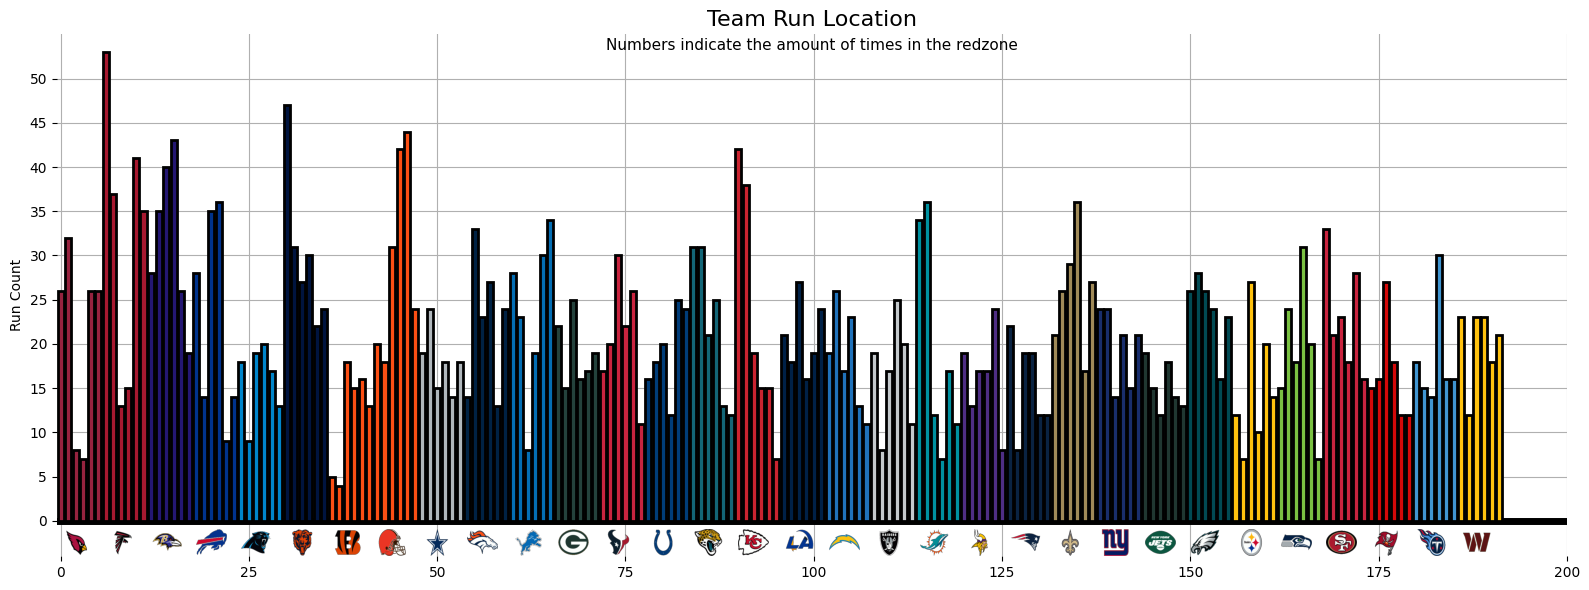

In [5]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in run_stats["posteam"]]

logo_images = []

for team in run_stats["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(run_stats.index, run_stats["run_count"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add logo
for i in range(len(run_stats["posteam"])):
    if ((i % 6 == 0)):
      logo_img = logo_images[i]
      plt.imshow(logo_img, extent=[i,i + 4, -4 , -1], aspect='auto', zorder=7)


ax.set_ylabel('Run Count')

# Add a main title
ax.set_title('Team Run Location', fontsize=16)

# Add subtitle
subtitle = 'Numbers indicate the amount of times in the redzone'
plt.text(0.5, 0.97, subtitle, fontsize=11, ha='center', transform=ax.transAxes)


plt.ylim(-4,55)
plt.xlim([-0.5, 200])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.xticks([])
plt.yticks(np.arange(0,55, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
tm = "LAC"

tm_run_stats = run_stats[run_stats["posteam"] == tm].reset_index()

teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_color = teamcolor.get(tm)

logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{tm}.png')  # Adjust the path to your logo images

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(tm_run_stats.index, tm_run_stats["run_count"], width=0.8, color=tm_color, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add logo
plt.imshow(logo_img, extent=[2,3, 35 , 50], aspect='auto', zorder=7)

categories = ["Left of Tackle", "Left of Guard", "Left of Center", "Right of Center","Right of Guard","Right of Tackle"]
for i in range(6):
  plt.text(i, 3, categories[i], ha='center', va='center', color='w', fontsize=18, zorder = 10)

ax.set_ylabel('Run Count')

# Add a main title
ax.set_title('Team Run Location', fontsize=16)


plt.ylim(-4,56)
plt.xlim([-0.5, 5.5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,56, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
stats = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)

In [11]:
# SUCCESS
passing = stats[stats["play_type"] == "pass"]
rushing = stats[stats["play_type"] == "run"]

passing_total = passing.groupby("posteam").size().reset_index(name = "pass_plays")
pass_success = passing.groupby("posteam")["success"].sum().reset_index()

pass_success["pass_success_percent"] = pass_success["success"] / passing_total["pass_plays"] * 100

rushing_total = rushing.groupby("posteam").size().reset_index(name = "run_plays")
rushing_success = rushing.groupby("posteam")["success"].sum().reset_index()

rushing_success["rush_success_percent"] = rushing_success["success"] / rushing_total["run_plays"] * 100

pass_success = pass_success.sort_values("pass_success_percent", ascending=False).reset_index(drop = True)
rushing_success = rushing_success.sort_values("rush_success_percent", ascending=False).reset_index(drop = True)

pass_success = pass_success.rename(columns={"posteam": "team"})
rushing_success = rushing_success.rename(columns={"posteam": "team"})

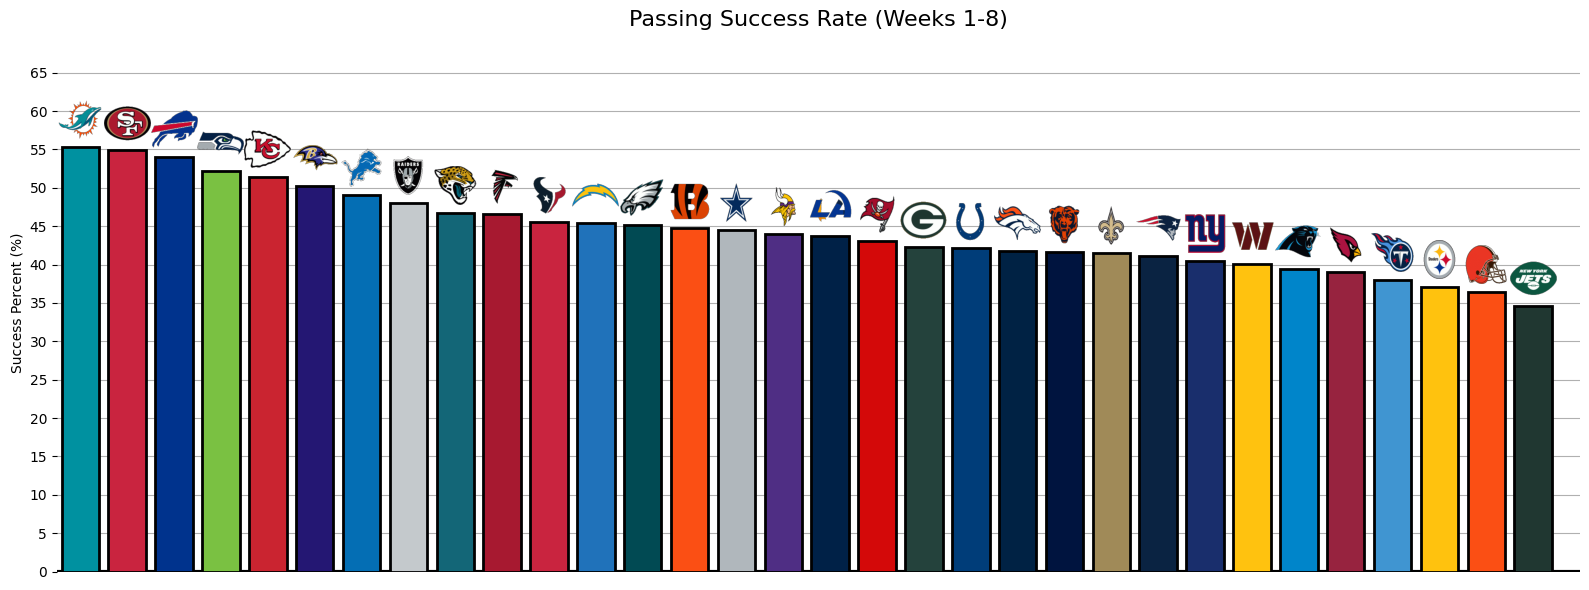

In [16]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in pass_success["team"]]

logo_images = []

for team in pass_success["team"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(pass_success["team"],pass_success["pass_success_percent"] , width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# # Add count
# for i in range(len(final_4th["posteam"])):
#    plt.text(i, pass_success["pass_success_percent"][i]-5, int(pass_success["pass_success_percent"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(pass_success["team"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, pass_success["pass_success_percent"][i] + 1 , pass_success["pass_success_percent"][i] + 6], aspect='auto', zorder=7)


ax.set_ylabel('Success Percent (%)')

# Add a main title
ax.set_title('Passing Success Rate (Weeks 1-8)', fontsize=16)

ax.axhline(y=0, color="k", linewidth=3)

# Add a subtitle
# subtitle = 'Number is the amount of attempts.'
# plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 70])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 70, 5))
plt.xticks([])

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

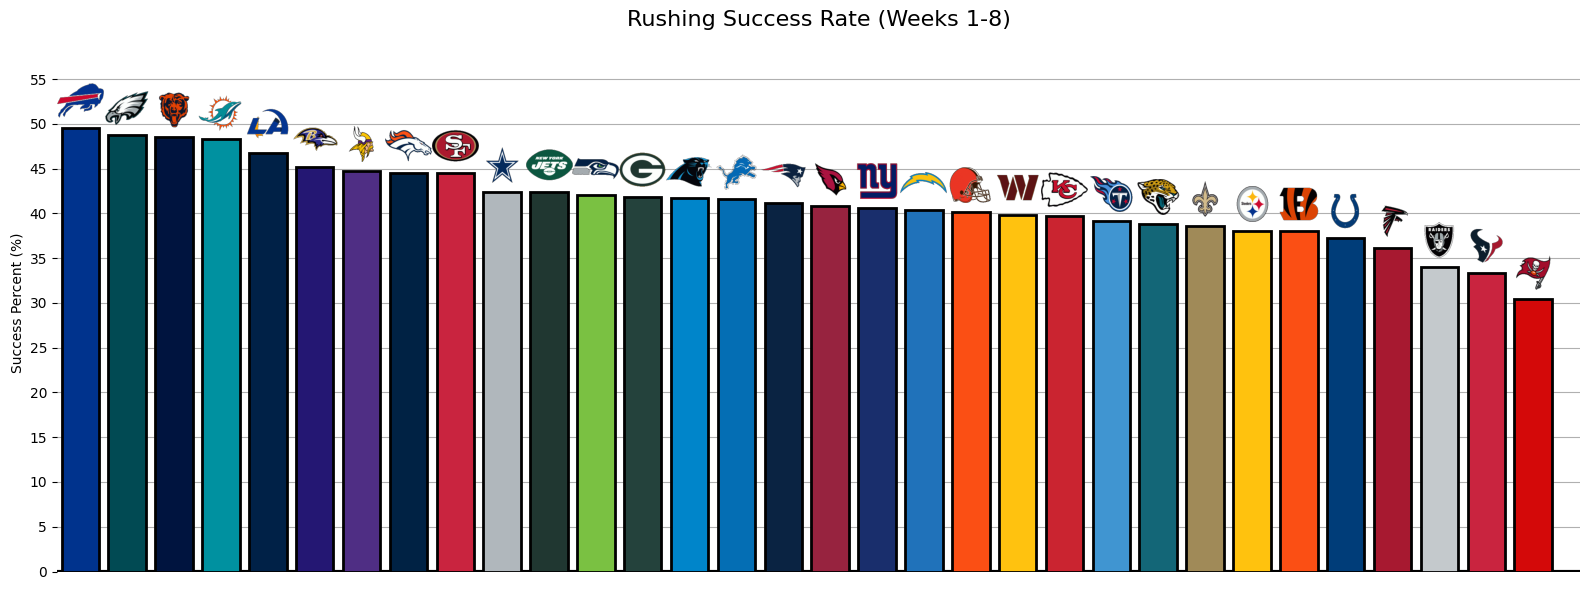

In [17]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in rushing_success["team"]]

logo_images = []

for team in rushing_success["team"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(rushing_success["team"],rushing_success["rush_success_percent"] , width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# # Add count
# for i in range(len(final_4th["posteam"])):
#    plt.text(i, pass_success["pass_success_percent"][i]-5, int(pass_success["pass_success_percent"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(rushing_success["team"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, rushing_success["rush_success_percent"][i] + 1 , rushing_success["rush_success_percent"][i] + 5], aspect='auto', zorder=7)

ax.axhline(y=0, color="k", linewidth=3)

ax.set_ylabel('Success Percent (%)')

# Add a main title
ax.set_title('Rushing Success Rate (Weeks 1-8)', fontsize=16)

# Add a subtitle
# subtitle = 'Number is the amount of attempts.'
# plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 60, 5))
plt.xticks([])

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
red_stats = nfl.import_pbp_data([2023])

redzone = red_stats[red_stats["drive_inside20"] == 1.0]
redzone_td = redzone[redzone["touchdown"] == 1.0]

redzone_drives = redzone.groupby("posteam")["drive_real_start_time"].nunique().reset_index()
redzone_tds = redzone_td.groupby("posteam")["touchdown"].size().reset_index()

redzone_tds["redzone_eff"] = redzone_tds["touchdown"] / redzone_drives["drive_real_start_time"] * 100

redzone_tds = redzone_tds.sort_values("redzone_eff", ascending=False).reset_index(drop = True)

redzone_tds = pd.merge(redzone_tds, redzone_drives, on='posteam', how='left')
redzone_tds = redzone_tds.rename(columns={"drive_real_start_time": "redzone_drives"})

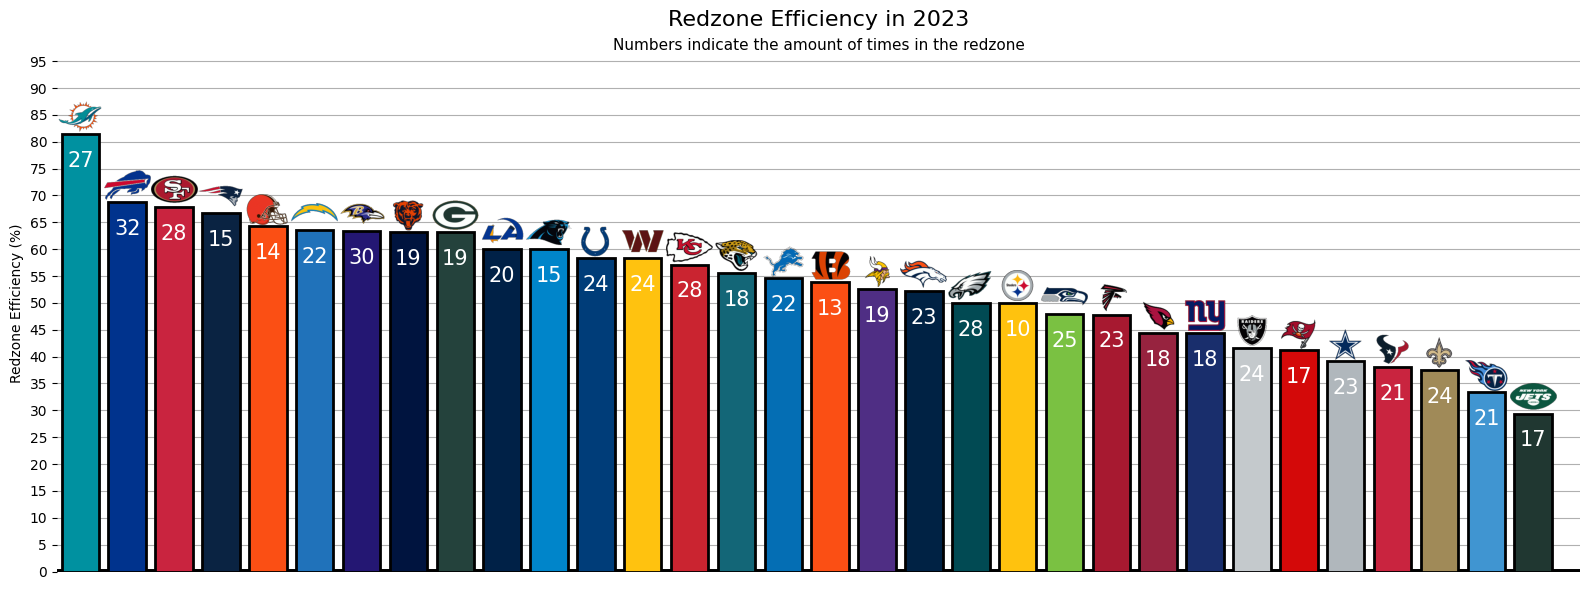

In [14]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in redzone_tds["posteam"]]

logo_images = []

for team in redzone_tds["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(redzone_tds.index, redzone_tds["redzone_eff"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add count
for i in range(len(redzone_tds["posteam"])):
    plt.text(i, redzone_tds["redzone_eff"][i] - 5, int(redzone_tds["redzone_drives"][i]), ha='center', va='center', color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(redzone_tds["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, redzone_tds["redzone_eff"][i] + 0.3 , redzone_tds["redzone_eff"][i] + 6], aspect='auto', zorder=7)


ax.set_ylabel('Redzone Efficiency (%)')

# Add a main title
ax.set_title('Redzone Efficiency in 2023', fontsize=16)

# Add subtitle
subtitle = 'Numbers indicate the amount of times in the redzone'
plt.text(0.5, 0.97, subtitle, fontsize=11, ha='center', transform=ax.transAxes)


plt.ylim(0,100)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,100, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
pbp_3rd = nfl.import_pbp_data([2023])

pbp_3rd = pbp_3rd[pbp_3rd["down"] == 3.0]
pbp_3rd = pbp_3rd[pbp_3rd["ydstogo"] >= 3]
pbp_3rd = pbp_3rd[pbp_3rd["play_type"] == "pass"]

2023 done.
Downcasting floats.


In [19]:
team_3rd_downs = pbp_3rd.groupby("posteam").size().reset_index(name = "count")
targets_3rd = pbp_3rd.groupby(["receiver", "posteam"]).size().reset_index(name = "targets")

rec_targets = targets_3rd.merge(team_3rd_downs, on="posteam")

rec_targets["target_percent"] = rec_targets["targets"] / rec_targets["count"] * 100


idx = rec_targets.groupby('posteam')['target_percent'].idxmax()

top_receivers = rec_targets.loc[idx].sort_values(by = "target_percent", ascending=False).reset_index()

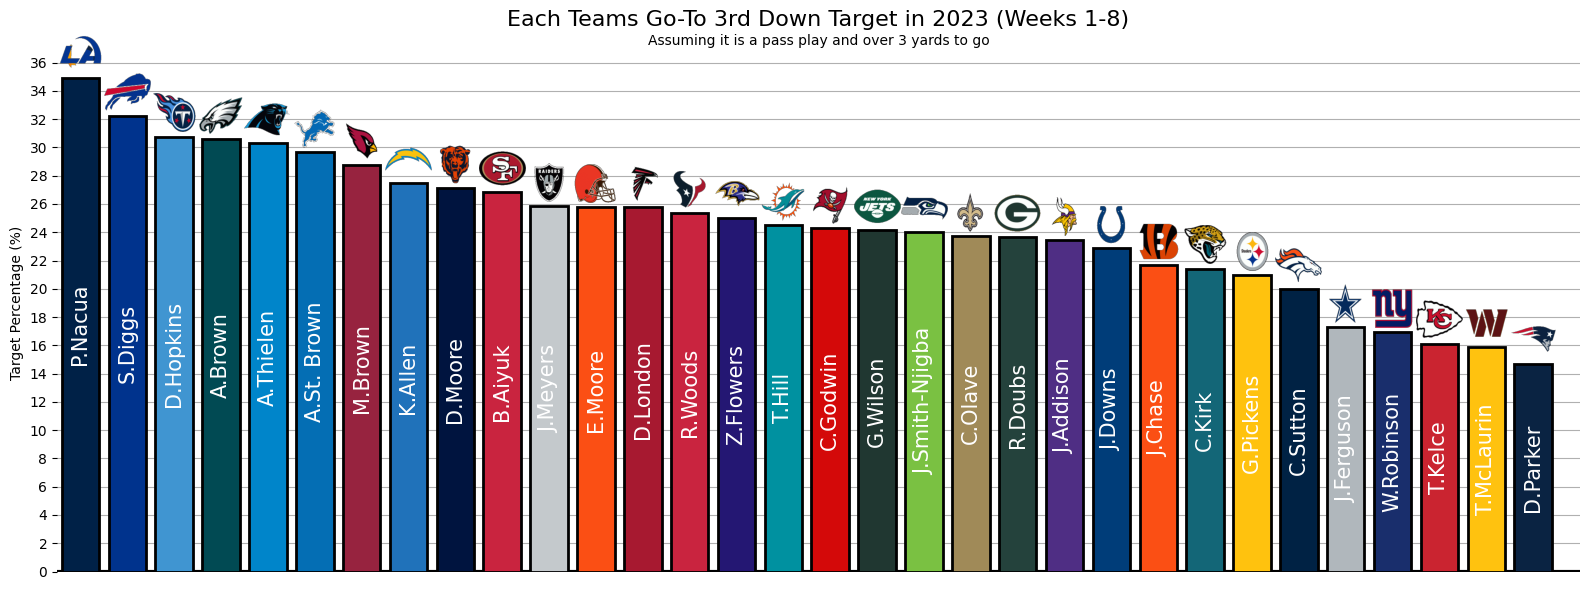

In [20]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in top_receivers["posteam"]]

logo_images = []

for team in top_receivers["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(top_receivers.index, top_receivers["target_percent"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(top_receivers["posteam"])):
    plt.text(i, top_receivers["target_percent"][i] / 2, top_receivers["receiver"][i], ha='center', va='center', rotation = 90, color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(top_receivers["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, top_receivers["target_percent"][i] + 0.3 , top_receivers["target_percent"][i] + 3], aspect='auto', zorder=7)


ax.set_ylabel('Target Percentage (%)')

# Add a main title
ax.set_title('Each Teams Go-To 3rd Down Target in 2023 (Weeks 1-8)', fontsize=16)

# Add a subtitle
subtitle = 'Assuming it is a pass play and over 3 yards to go'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim(0,38)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,38, 2))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
pbp_3rd = nfl.import_pbp_data(range(2013, 2024))

pbp_3rd = pbp_3rd[pbp_3rd["down"] == 3.0]
pbp_3rd = pbp_3rd[pbp_3rd["play_type"] == "pass"]

2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [22]:
team_3rd_downs = pbp_3rd.groupby("posteam").size().reset_index(name = "count")
targets_3rd = pbp_3rd.groupby(["receiver", "posteam"]).size().reset_index(name = "targets")

rec_targets = targets_3rd.merge(team_3rd_downs, on="posteam")

rec_targets["target_percent"] = rec_targets["targets"] / rec_targets["count"] * 100


idx = rec_targets.groupby('posteam')['target_percent'].idxmax()

top_receivers = rec_targets.loc[idx].sort_values(by = "target_percent", ascending=False).reset_index()

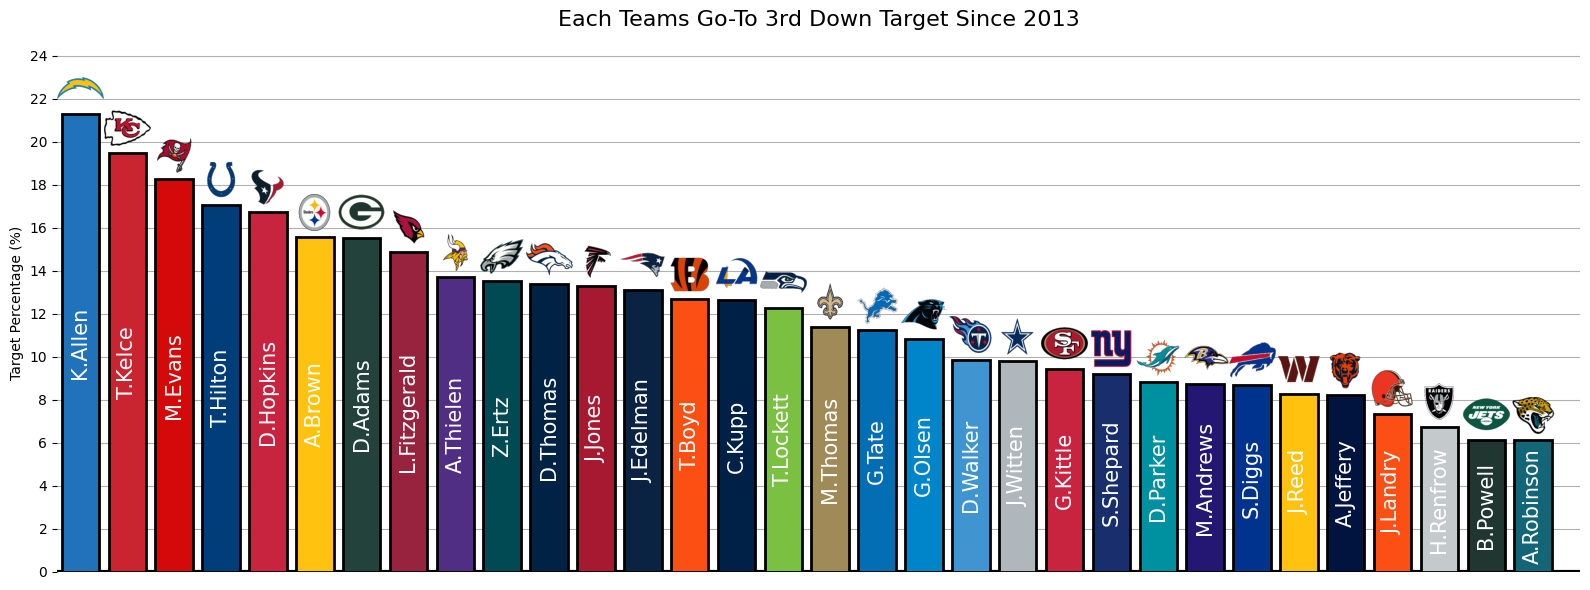

In [23]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in top_receivers["posteam"]]

logo_images = []

for team in top_receivers["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(top_receivers.index, top_receivers["target_percent"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(top_receivers["posteam"])):
    plt.text(i, top_receivers["target_percent"][i] / 2, top_receivers["receiver"][i], ha='center', va='center', rotation = 90, color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(top_receivers["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, top_receivers["target_percent"][i] + 0.3 , top_receivers["target_percent"][i] + 2], aspect='auto', zorder=7)


ax.set_ylabel('Target Percentage (%)')

# Add a main title
ax.set_title('Each Teams Go-To 3rd Down Target Since 2013', fontsize=16)


plt.ylim(0,25)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,25, 2))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()